In [169]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [170]:
#read csv
df = pd.read_csv("pet_supplies_2212.csv")
df.head(5)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [172]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [173]:
df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [174]:
#df category
df.value_counts("category")

category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: count, dtype: int64

In [175]:
#change "-" to Unknown
df["category"] = df["category"].str.replace("-","Unknown")
df.value_counts("category")

category
Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: count, dtype: int64

In [176]:
#df animal
df.value_counts("animal")

animal
Cat     567
Fish    369
Dog     367
Bird    197
Name: count, dtype: int64

In [177]:
#df size
df.value_counts("size")

size
small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: count, dtype: int64

In [178]:
df["size"] = df["size"].str.lower().str.capitalize()
df.value_counts("size")

size
Small     754
Medium    492
Large     254
Name: count, dtype: int64

In [179]:
df.value_counts("price")

price
unlisted    150
22.98        13
28           10
28.03         8
27.99         8
           ... 
28.23         1
28.22         1
28.19         1
28.08         1
28.9          1
Name: count, Length: 707, dtype: int64

In [180]:
#df price
df["price"] = df["price"].replace("unlisted", float('nan'))
df["price"].isna().sum()

150

In [181]:
df["price"] = df["price"].astype(float).fillna(df["price"].median()).round(2)
df.value_counts("price")

price
28.06    156
22.98     13
28.00     10
27.99      8
28.03      8
        ... 
28.22      1
28.19      1
28.08      1
28.05      1
54.16      1
Name: count, Length: 706, dtype: int64

In [182]:
#df sales
df.value_counts("sales")

sales
1034.36    3
998.18     2
1085.60    2
1027.15    2
837.87     2
          ..
833.95     1
833.39     1
833.26     1
832.65     1
2255.96    1
Name: count, Length: 1476, dtype: int64

In [183]:
#df rating
df.value_counts("rating")

rating
5.0    304
6.0    299
4.0    283
3.0    190
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: count, dtype: int64

In [184]:
df["rating"].isna().sum()

150

In [185]:
df = df.dropna(subset=['rating'])
df["rating"].isna().sum()

0

In [186]:
#df repeat purchase
df.value_counts("repeat_purchase")

repeat_purchase
1    819
0    531
Name: count, dtype: int64

In [187]:
df.head(10)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,Medium,28.90,1074.31,4.0,0
8,9,Equipment,Fish,Medium,17.82,503.67,5.0,0
9,10,Medicine,Dog,Medium,24.93,838.88,8.0,0


#### Univariate Analysis

In [188]:
# Analyze the distribution of products across categories
category_counts = df['category'].value_counts()
category_table = pd.DataFrame({'Categories': category_counts.index, 'Count': category_counts.values})
category_table['Percentage'] = ((category_table['Count'] / category_table['Count'].sum()) * 100).round(2).astype(str) + " %"
print("\nDistribution of Products Across Categories:")
category_table


Distribution of Products Across Categories:


,Categories,Count,Percentage
0,Equipment,332,24.59 %
1,Food,240,17.78 %
2,Toys,231,17.11 %
3,Medicine,207,15.33 %
4,Housing,205,15.19 %
5,Accessory,114,8.44 %
6,Unknown,21,1.56 %


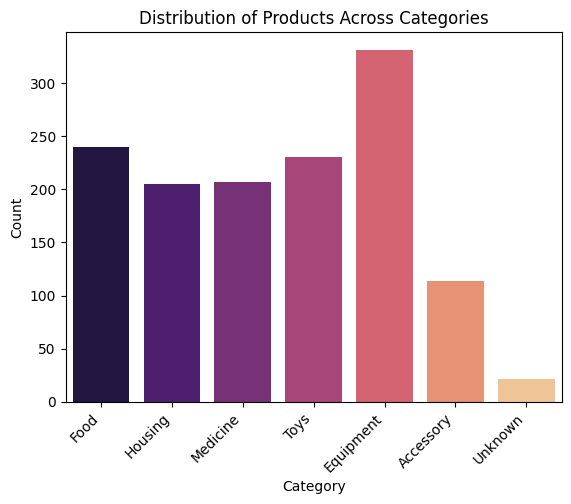

In [189]:
# Visualization of categories
plt.figure(dpi=100)
sns.countplot(x='category', data=df, palette='magma')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [190]:
# Distribution of products based on the type of animals
animal_counts = df['animal'].value_counts()
animal_table = pd.DataFrame({'Animals': animal_counts.index, 'Count': animal_counts.values})
animal_table['Percentage'] = ((animal_table['Count'] / animal_table['Count'].sum()) * 100).round(2).astype(str) + " %"
print("\nDistribution of Animals Type:")
animal_table


Distribution of Animals Type:


,Animals,Count,Percentage
0,Cat,509,37.7 %
1,Fish,340,25.19 %
2,Dog,327,24.22 %
3,Bird,174,12.89 %


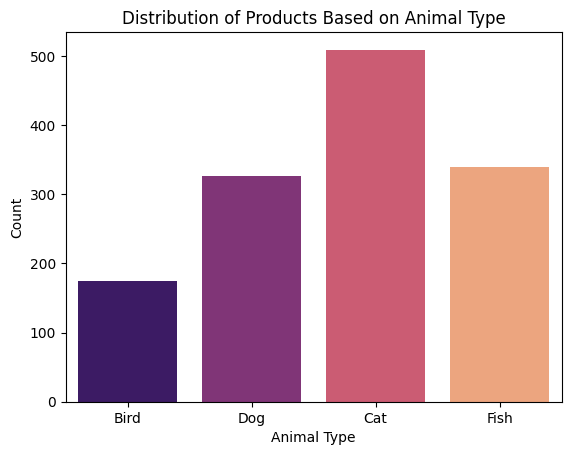

In [191]:
# Visualization of animal type
plt.figure(dpi=100)
sns.countplot(x='animal', data=df, palette='magma')
plt.title('Distribution of Products Based on Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

In [192]:
# Distribution of products across sizes
size_counts = df['size'].value_counts()
size_table = pd.DataFrame({'Size': size_counts.index, 'Count': size_counts.values})
size_table['Percentage'] = ((size_table['Count'] / size_table['Count'].sum()) * 100).round(2).astype(str) + " %"
print("\nDistribution of Products Across Sizes:")
size_table


Distribution of Products Across Sizes:


,Size,Count,Percentage
0,Small,676,50.07 %
1,Medium,451,33.41 %
2,Large,223,16.52 %


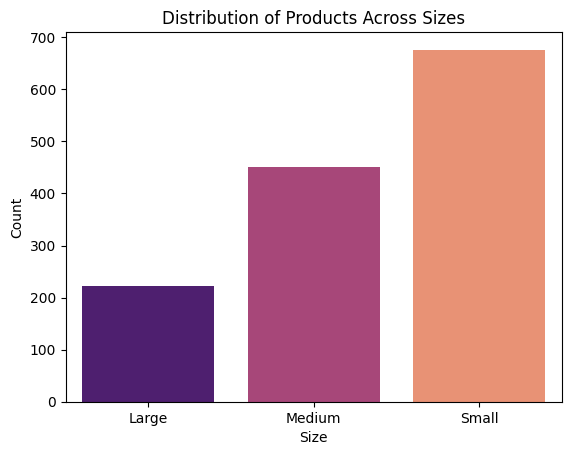

In [193]:
# Visualization of size
plt.figure(dpi=100)
sns.countplot(x='size', data=df, palette='magma')
plt.title('Distribution of Products Across Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

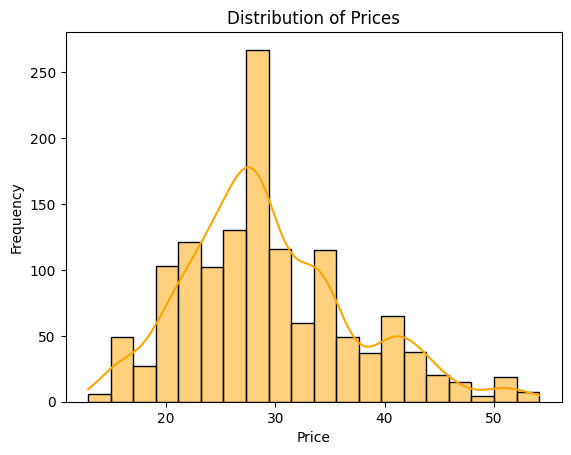

In [194]:
# Distribution of price
plt.figure(dpi=100)
sns.histplot(df['price'], bins=20, kde=True, color='orange')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

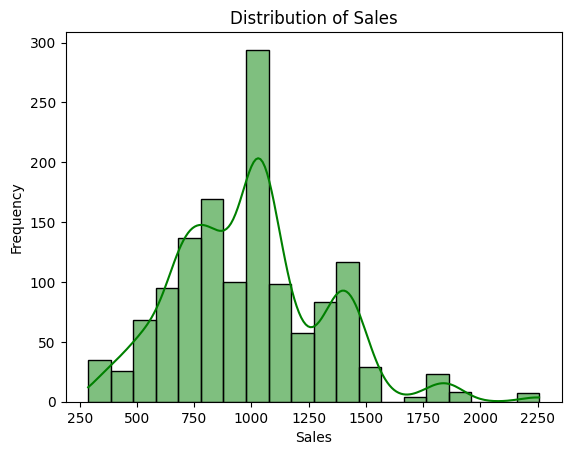

In [195]:
# Distribution of Sales
plt.figure(dpi=100)
sns.histplot(df['sales'], bins=20, kde=True, color='green')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

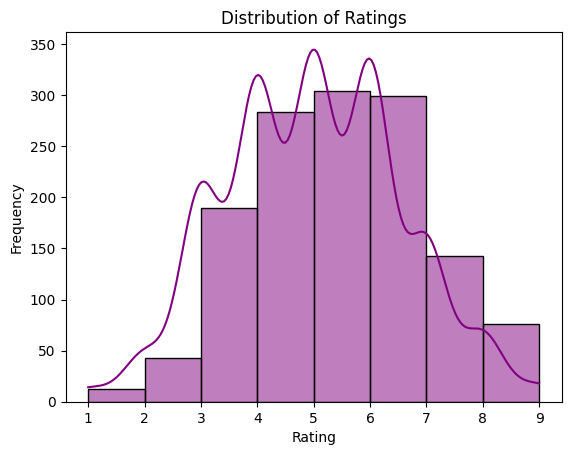

In [207]:
# Distribution of Rating
plt.figure(dpi=100)
sns.histplot(df['rating'], bins=8, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [197]:
# Distribution of products across sizes
repeat_purchase_counts = df['repeat_purchase'].value_counts()
repeat_purchase_table = pd.DataFrame({'Repeat Purchases': repeat_purchase_counts.index, 'Count': repeat_purchase_counts.values})
repeat_purchase_table

,Repeat Purchases,Count
0,1,819
1,0,531


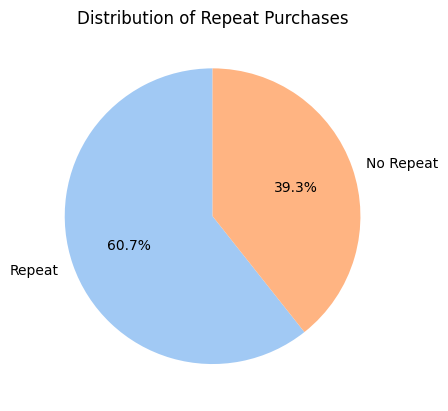

In [198]:
# Distribution of Repeat Purchases
plt.figure(dpi=100)

plt.pie(df['repeat_purchase'].value_counts(), labels=['Repeat', 'No Repeat'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Repeat Purchases')

plt.show()

#### Bivariate Analysis

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Housing'),
  Text(2, 0, 'Medicine'),
  Text(3, 0, 'Toys'),
  Text(4, 0, 'Equipment'),
  Text(5, 0, 'Accessory'),
  Text(6, 0, 'Unknown')])

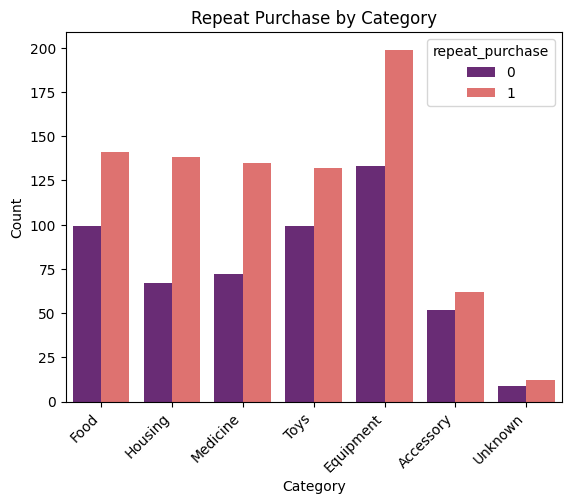

In [199]:
#Visualize repeat purchase by category
plt.figure(dpi=100)
sns.countplot(x='category', hue='repeat_purchase', data=df, palette='magma')
plt.title('Repeat Purchase by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

Text(0, 0.5, 'Count')

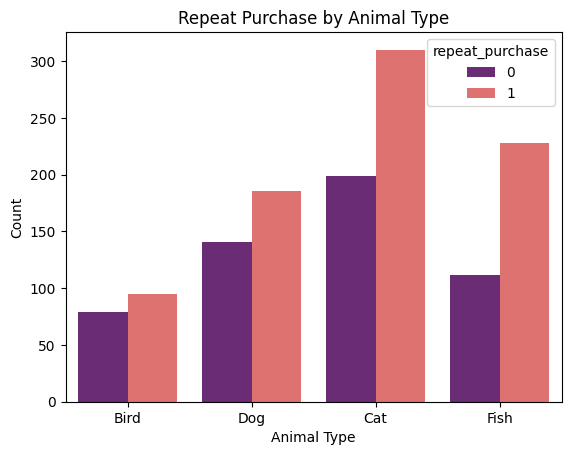

In [200]:
#Visualize repeat purchase by animal type
plt.figure(dpi=100)
sns.countplot(x='animal', hue='repeat_purchase', data=df, palette='magma')
plt.title('Repeat Purchase by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

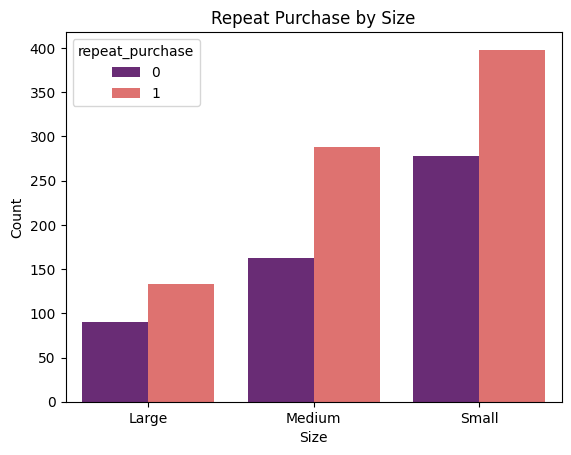

In [201]:
#Visualize repeat purchase by size
plt.figure(dpi=100)
sns.countplot(x='size', hue='repeat_purchase', data=df, palette='magma')
plt.title('Repeat Purchase by Size')
plt.xlabel('Size')
plt.ylabel('Count')

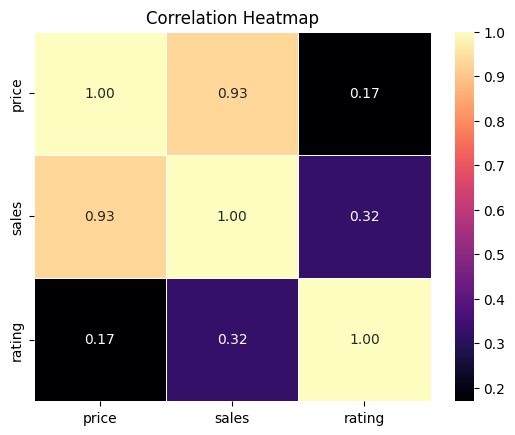

In [202]:
#Visualize the numerical column corr using heatmap
num = ['price', 'sales', 'rating']
corr = df[num].corr()
plt.figure(dpi=100)
sns.heatmap(corr, annot=True, cmap='magma', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

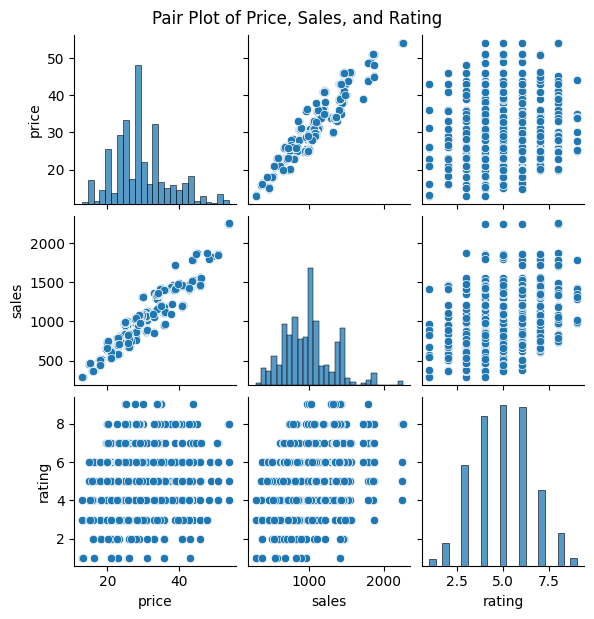

In [203]:
# Visualization relationships between num variables
sns.pairplot(df[['price', 'sales', 'rating']], height=2, kind='scatter')
plt.suptitle('Pair Plot of Price, Sales, and Rating', y=1.02)
plt.show()